# Assignment 4 Trevor Durning 10/04/2024

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [6]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


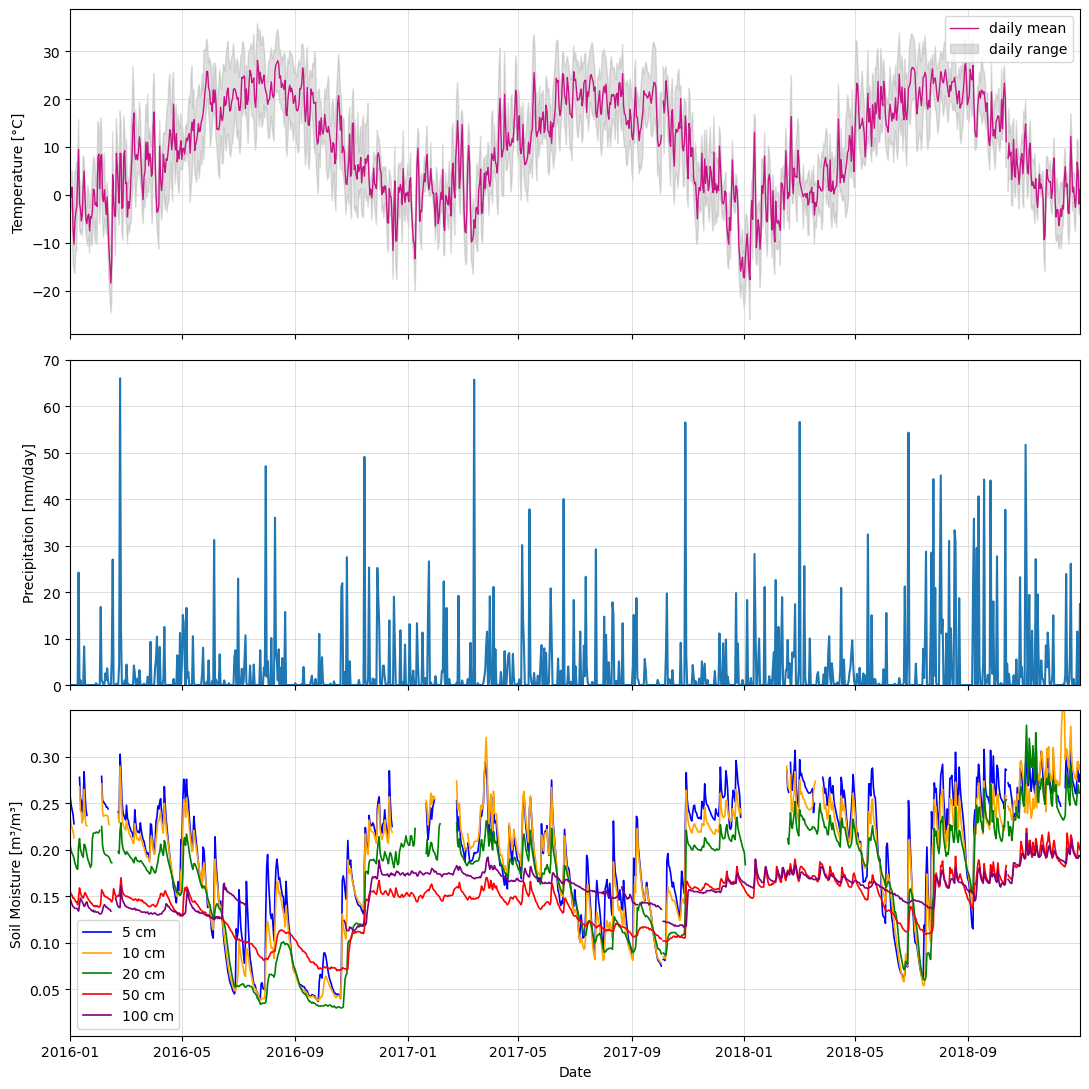

In [82]:
# Importing libraries.
import numpy as np
import matplotlib.pyplot as plt

# Creating arrays.
dates = np.array(date)
T_DAILY_MAX = np.array(t_daily_max)
T_DAILY_MIN = np.array(t_daily_min)
T_DAILY_MEAN = np.array(t_daily_mean)
P_DAILY_CALC = np.array(p_daily_calc) 
SOIL_MOISTURE_5_DAILY = np.array(soil_moisture_5)
SOIL_MOISTURE_10_DAILY = np.array(soil_moisture_10)  
SOIL_MOISTURE_20_DAILY = np.array(soil_moisture_20)  
SOIL_MOISTURE_50_DAILY = np.array(soil_moisture_50)  
SOIL_MOISTURE_100_DAILY = np.array(soil_moisture_100) 

# Creating plots.
fig, axs = plt.subplots(3, 1, figsize=(11,11), sharex=True)
start_date = np.datetime64('2016-01-01')
end_date = np.datetime64('2018-12-31')

# Plot 1: Temperature
axs[0].plot(dates, T_DAILY_MEAN, color='mediumvioletred', label='daily mean', linewidth=1.0)
axs[0].fill_between(dates, T_DAILY_MIN, T_DAILY_MAX, color='gray', alpha=0.25, label='daily range')
axs[0].set_ylabel('Temperature [°C]')
axs[0].legend(loc='upper right')
axs[0].grid(True, which='both', color='#D3D3D3', linestyle='-', linewidth=0.5)

# Plot 2: Precipitation
axs[1].plot(dates, P_DAILY_CALC,  linewidth=1.5)
axs[1].set_ylabel('Precipitation [mm/day]')
axs[1].set_ylim(0, 70)  # Set the y-axis limit to 70 for precipitation
axs[1].grid(True, which='both', color='#D3D3D3', linestyle='-', linewidth=0.5)

# Plot 3: Soil Moisture
axs[2].plot(dates, SOIL_MOISTURE_5_DAILY, label='5 cm', color='blue', linewidth=1.2)
axs[2].plot(dates, SOIL_MOISTURE_10_DAILY, label='10 cm', color='orange', linewidth=1.2)
axs[2].plot(dates, SOIL_MOISTURE_20_DAILY, label='20 cm', color='green', linewidth=1.2)
axs[2].plot(dates, SOIL_MOISTURE_50_DAILY, label='50 cm', color='red', linewidth=1.2)
axs[2].plot(dates, SOIL_MOISTURE_100_DAILY, label='100 cm', color='purple', linewidth=1.2)

# Y axis plot 3
axs[2].set_yticks(np.arange(0.05, 0.35, 0.05))  # Ensure the final tick is 0.30
axs[2].set_ylim(0, 0.35)  # Set the y-axis limit to cap at 0.30
axs[2].set_ylabel('Soil Moisture [m³/m³]')
axs[2].legend(loc='lower left')
axs[2].grid(True, which='both', color='#D3D3D3', linestyle='-', linewidth=0.5)

# X-axis.
plt.xlim(start_date, end_date)
axs[2].set_xlabel('Date')
plt.xticks(rotation=0)

# Layout and visualize.
plt.tight_layout()
plt.show()
